<a href="https://colab.research.google.com/github/sisifo3/P_T_2/blob/main/rotate_imagev3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
pip install photutils

In [7]:
from photutils.datasets import make_4gaussians_image
from photutils.centroids import centroid_com, centroid_quadratic
from photutils.centroids import centroid_1dg, centroid_2dg
import cv2
import matplotlib.pyplot as plt
import math
from google.colab.patches import cv2_imshow
import numpy as np
from numpy.linalg import norm 

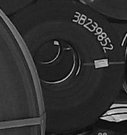

In [58]:
data1 = '/content/drive/MyDrive/img_prepTech_1/original_img/img9.png'
imgOr = cv2.imread(data1, cv2.IMREAD_GRAYSCALE)
cv2_imshow(imgOr)

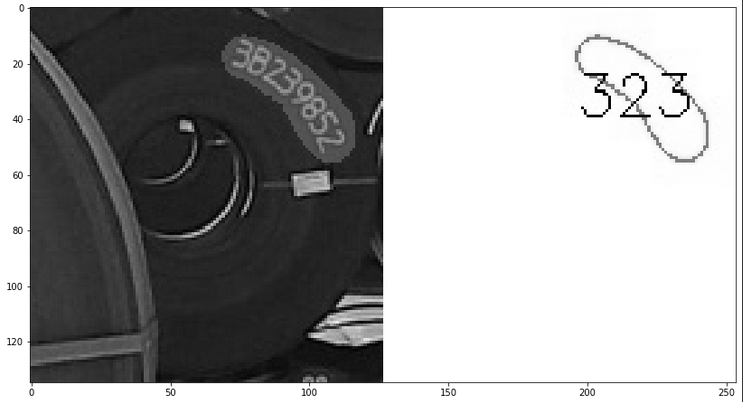

In [59]:
data = '/content/drive/MyDrive/img_prepTech_1/tex_rec_det_img/img9.png'
img = cv2.imread(data, cv2.IMREAD_GRAYSCALE) 
cv2_imshow(img)

In [60]:
height, width = img.shape
print(height)
print(width)

a = math.floor(width/2)
print(a)

b = math.floor(height/10)
print(b)

c = math.floor((width/2)/10)
print(c)

croppedImage = img[b: (height-b), (a+c):(width-c)] 

402
743
371
40
37


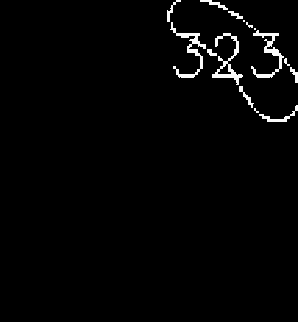

In [61]:
ret, thresh = cv2.threshold(croppedImage,200,250,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
cv2_imshow(thresh)

In [62]:
x2, y2 = centroid_com(thresh)
print(x2,y2)

232.83260869565217 56.77717391304348


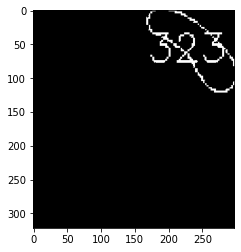

In [63]:
plt.imshow(thresh,cmap ='gray')
#plt.scatter(x1,y1,color ='tan',marker= '*')
plt.show()

In [64]:
x =  math.floor((len(thresh[0])) /2)
y = ((len(thresh))/2)
 
print(y,x) 

x1 = x
y1 = 0

print(y1,x1)
print(y2,x2)


x2b = (x2 - x)
y2b = (y2 - y)
x1b = (x1 - x)
y1b = (y1 - y)
x0b = 0
y0b = 0


A = [y1b,x1b]
B = [y2b,x2b]

a = np.dot(A,B)

b = (norm(A,2))*(norm(B,2))

c = a/b

d = math.acos(c)

e = math.degrees(d)
print(e)

161.0 149
0 149
56.77717391304348 232.83260869565217
38.81178628553574


In [53]:
#x = x1
#y = y1
#t = math.atan(y/x)
#td = math.degrees(t)
#print(td)

In [65]:
def rotate_image(image, angle):
  image_center = tuple(np.array(image.shape[1::-1]) / 2)
  rot_mat = cv2.getRotationMatrix2D(image_center, angle, 1.0)
  result = cv2.warpAffine(image, rot_mat, image.shape[1::-1], flags=cv2.INTER_LINEAR)
  return result

angle = e
imgA = imgOr

img2 = rotate_image(imgA, angle)  

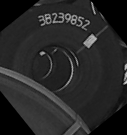

In [66]:
cv2_imshow(img2)
